In [70]:
# pip install mpl_finance

In [2]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# import matplotlib.dates as mpl_dates
import scipy.stats as st
import requests
import finnhub
from pprint import pprint
from datetime import datetime
from mpl_finance import candlestick_ohlc
from config import *

In [43]:
# print(finnhub_client.company_basic_financials('MSFT', 'margin'))
# print(finnhub_client.quote('MSFT'))

In [3]:
# dow = pd.read_csv('Resources/DowJones.csv')
# nasdaq = pd.read_csv('Resources/Nasdaq.csv')
# sp500 = pd.read_csv('Resources/SP500.csv')

base_url = "https://finnhub.io/api/v1"

dow = ['MSFT','AAPL','V','JPM','JNJ','WMT','PG','INTC','UNH','XOM','HD','DIS','KO','VZ','MRK',
      'PFE','CVX','CSCO','BA','MCD','NKE','IBM','UTX','AXP','MMM','GS','CAT', 'WBA','TRV']

# dow = ['MSFT','AAPL','V','JPM','JNJ','WMT','PG','INTC','UNH','XOM','HD','DIS','KO','VZ','MRK',
#       'PFE','CVX','CSCO','BA','MCD','NKE','IBM','UTX','AXP','MMM','GS','CAT','WBA',**'DWDP'**,'TRV']

In [4]:
dow_high = []
dow_high_date = []
dow_low = []
dow_low_date = []

for stock in dow:
    query_url = f'{base_url}/stock/metric?symbol={stock}&metric=all&token={Api_key}'
    response = requests.get(query_url).json()
    
    dow_high.append(response['metric']['52WeekHigh'])
    dow_high_date.append(response['metric']['52WeekHighDate'])
    dow_low.append(response['metric']['52WeekLow'])
    dow_low_date.append(response['metric']['52WeekLowDate'])

In [5]:
dow_dict = {
    "Dow Ticker Symbol" : dow,
    "Dow 52 Week High" : dow_high,
    "Dow 52 Week High Date" : dow_high_date,
    "Dow 52 Week Low" : dow_low,
    "Dow 52 Week Low Date" : dow_low_date
}

dow_high_df = pd.DataFrame(dow_dict)

dow_high_df['Dow 52 Week High Date'] = pd.to_datetime(dow_high_df['Dow 52 Week High Date'])
dow_high_df['Dow 52 Week Low Date'] = pd.to_datetime(dow_high_df['Dow 52 Week Low Date'])

dow_high_df

,Dow Ticker Symbol,Dow 52 Week High,Dow 52 Week High Date,Dow 52 Week Low,Dow 52 Week Low Date
0,MSFT,216.3800,2020-07-09,130.7800,2019-08-05
1,AAPL,399.8200,2020-07-13,192.5800,2019-08-05
2,V,214.1700,2020-02-19,133.9300,2020-03-23
3,JPM,141.1000,2020-01-02,76.9100,2020-03-19
4,JNJ,157.0000,2020-04-23,109.1600,2020-03-23
5,WMT,134.1300,2020-07-15,102.0000,2020-03-16
6,PG,128.0900,2020-02-06,94.3400,2020-03-23
7,INTC,69.2900,2020-01-24,43.6300,2020-03-16
8,UNH,315.8400,2020-06-08,187.7200,2020-03-23
9,XOM,75.7800,2019-07-25,30.1100,2020-03-23


In [6]:
dow_low_group = dow_high_df.groupby('Dow 52 Week Low Date').agg({'Dow Ticker Symbol': ["count","- ".join],"Dow 52 Week Low":["mean", "max", "min"]})
dow_ticker_low = dow_low_group['Dow Ticker Symbol']
dow_ticker_low = dow_ticker_low.rename(columns = {"count" :"Dow Low Count", "join" : "Dow Low Ticker Symbols"})
dow_ticker_low

,Dow Low Count,Dow Low Ticker Symbols
Dow 52 Week Low Date,,
2019-08-05,2,MSFT- AAPL
2020-03-12,1,CAT
2020-03-16,3,WMT- INTC- CSCO
2020-03-18,8,HD- DIS- BA- MCD- NKE- UTX- AXP- TRV
2020-03-19,3,JPM- CVX- GS
2020-03-23,10,V- JNJ- PG- UNH- XOM- KO- MRK- PFE- IBM- MMM
2020-03-25,1,VZ
2020-05-14,1,WBA


In [7]:
dow_high_group = dow_high_df.groupby('Dow 52 Week High Date').agg({'Dow Ticker Symbol': ["count", "- ".join],"Dow 52 Week High":["mean", "max", "min"]})
dow_ticker_high = dow_high_group['Dow Ticker Symbol']
dow_ticker_high = dow_ticker_high.rename(columns = {"count" :"Dow High Count", "join" : "Dow High Ticker Symbols"})
dow_ticker_high

,Dow High Count,Dow High Ticker Symbols
Dow 52 Week High Date,,
2019-07-24,1,CSCO
2019-07-25,2,XOM- CVX
2019-07-26,1,PFE
2019-08-09,1,MCD
2019-09-06,1,TRV
2019-09-25,1,BA
2019-11-05,1,WBA
2019-11-26,1,DIS
2019-12-20,2,VZ- MRK


In [8]:
dow_high_low_df = pd.concat([dow_ticker_high, dow_ticker_low]).sort_index()
dow_high_low_df

,Dow High Count,Dow High Ticker Symbols,Dow Low Count,Dow Low Ticker Symbols
2019-07-24,1.0,CSCO,NaN,NaN
2019-07-25,2.0,XOM- CVX,NaN,NaN
2019-07-26,1.0,PFE,NaN,NaN
2019-08-05,NaN,NaN,2.0,MSFT- AAPL
2019-08-09,1.0,MCD,NaN,NaN
2019-09-06,1.0,TRV,NaN,NaN
2019-09-25,1.0,BA,NaN,NaN
2019-11-05,1.0,WBA,NaN,NaN
2019-11-26,1.0,DIS,NaN,NaN
2019-12-20,2.0,VZ- MRK,NaN,NaN


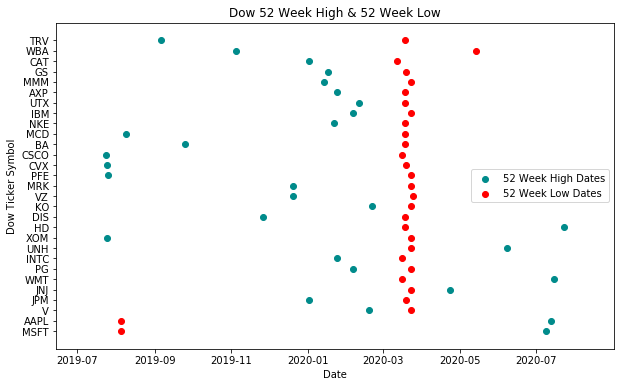

In [60]:
plt.figure(figsize=(10,6))

x_values = dow_high_df['Dow 52 Week High Date']
x_values1 = dow_high_df['Dow 52 Week Low Date']
y_values = dow_high_df['Dow Ticker Symbol']

plt.scatter(x_values,y_values, label = '52 Week High Dates', color = "darkcyan")
plt.scatter(x_values1,y_values, label = '52 Week Low Dates', color = "red")

plt.title("Dow 52 Week High & 52 Week Low")
plt.xlabel('Date')
plt.ylabel('Dow Ticker Symbol')

plt.legend(loc="best")

plt.savefig("Figures/Dow 52 Week High & 52 Week Low.jpg")
plt.show()

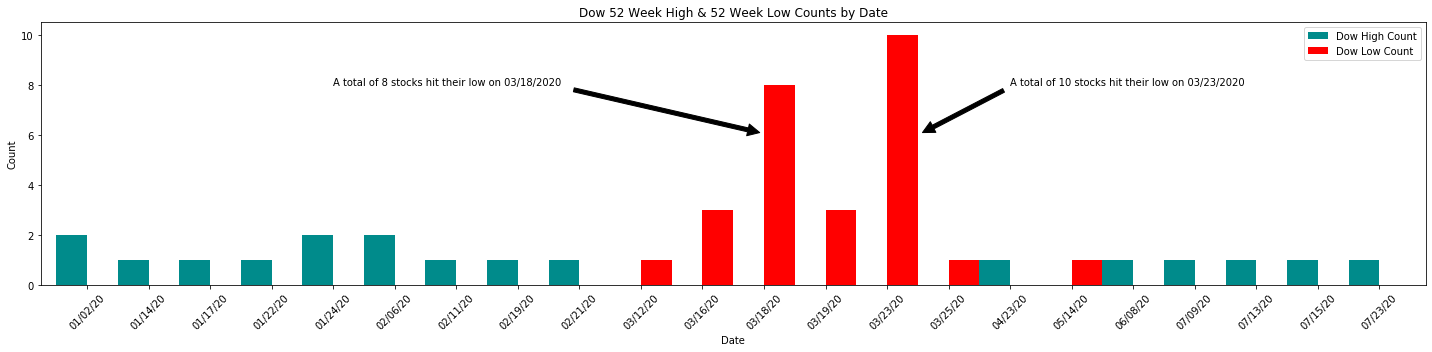

In [59]:
dow_yr_2020 = dow_high_low_df[(dow_high_low_df.index >='2020-01-01')]

multi_plot = dow_yr_2020[['Dow High Count', 'Dow Low Count']].plot(kind = 'bar' , width = 1, figsize = (20,5), color = ['darkcyan', 'r'])
multi_plot.set_xticklabels(dow_yr_2020.index.strftime("%x"), rotation = 45)

plt.title("Dow 52 Week High & 52 Week Low Counts by Date")
plt.xlabel('Date')
plt.ylabel('Count')

multi_plot.annotate('A total of 8 stocks hit their low on 03/18/2020', xy=(11.1, 6), xytext=(4, 8),
            arrowprops=dict(facecolor='black', shrink=0.05))

multi_plot.annotate('A total of 10 stocks hit their low on 03/23/2020', xy=(13.5, 6), xytext=(15, 8),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.savefig("Figures/Dow 52 Week High & 52 Week Low Counts by Date.jpg")
plt.show()

In [17]:
sp500 = ['MSFT','AAPL','AMZN','FB','GOOGL','JNJ','JPM','V','PG','MA','INTC','UNH',
        'BAC','T','HD','XOM','DIS','VZ','KO','MRK','CMCSA','CVX','PEP','PFE']

# sp500 = ['MSFT','AAPL','AMZN','FB',**'BBRK.B'**,'GOOGL',**'GOOG'**,'JNJ','JPM','V','PG','MA','INTC','UNH',
#         'BAC','T','HD','XOM','DIS','VZ','KO','MRK','CMCSA','CVX','PEP','PFE']

In [18]:
sp500_high = []
sp500_high_date = []
sp500_low = []
sp500_low_date = []

for stock in sp500:
    query_url = f'{base_url}/stock/metric?symbol={stock}&metric=all&token={Api_key}'
    response = requests.get(query_url).json()
    
    sp500_high.append(response['metric']['52WeekHigh'])
    sp500_high_date.append(response['metric']['52WeekHighDate'])
    sp500_low.append(response['metric']['52WeekLow'])
    sp500_low_date.append(response['metric']['52WeekLowDate'])

In [19]:
sp500_dict = {
    "SP500 Ticker Symbol" : sp500,
    "SP500 52 Week High" : sp500_high,
    "SP500 52 Week High Date" : sp500_high_date,
    "SP500 52 Week Low" : sp500_low,
    "SP500 52 Week Low Date" : sp500_low_date
}

sp500_high_df = pd.DataFrame(sp500_dict)

sp500_high_df['SP500 52 Week High Date'] = pd.to_datetime(sp500_high_df['SP500 52 Week High Date'])
sp500_high_df['SP500 52 Week Low Date'] = pd.to_datetime(sp500_high_df['SP500 52 Week Low Date'])

sp500_high_df

,SP500 Ticker Symbol,SP500 52 Week High,SP500 52 Week High Date,SP500 52 Week Low,SP500 52 Week Low Date
0,MSFT,216.38,2020-07-09,130.7800,2019-08-05
1,AAPL,399.82,2020-07-13,192.5800,2019-08-05
2,AMZN,3344.29,2020-07-13,1626.0318,2020-03-16
3,FB,250.15,2020-07-13,137.1006,2020-03-18
4,GOOGL,1587.05,2020-07-21,1008.8700,2020-03-23
5,JNJ,157.00,2020-04-23,109.1600,2020-03-23
6,JPM,141.10,2020-01-02,76.9100,2020-03-19
7,V,214.17,2020-02-19,133.9300,2020-03-23
8,PG,128.09,2020-02-06,94.3400,2020-03-23
9,MA,347.25,2020-02-20,199.9900,2020-03-23


In [20]:
sp500_low_group = sp500_high_df.groupby('SP500 52 Week Low Date').agg({'SP500 Ticker Symbol': ["count","- ".join],"SP500 52 Week Low":["mean", "max", "min"]})
sp500_ticker_low = sp500_low_group['SP500 Ticker Symbol']
sp500_ticker_low = sp500_ticker_low.rename(columns = {"count" :"SP500 Low Count", "join" : "SP500 Low Ticker Symbols"})
sp500_ticker_low

,SP500 Low Count,SP500 Low Ticker Symbols
SP500 52 Week Low Date,,
2019-08-05,2,MSFT- AAPL
2020-03-16,2,AMZN- INTC
2020-03-18,3,FB- HD- DIS
2020-03-19,2,JPM- CVX
2020-03-20,1,PEP
2020-03-23,13,GOOGL- JNJ- V- PG- MA- UNH- BAC- T- XOM- KO- M...
2020-03-25,1,VZ


In [21]:
sp500_high_group = sp500_high_df.groupby('SP500 52 Week High Date').agg({'SP500 Ticker Symbol': ["count", "- ".join],"SP500 52 Week High":["mean", "max", "min"]})
sp500_ticker_high = sp500_high_group['SP500 Ticker Symbol']
sp500_ticker_high = sp500_ticker_high.rename(columns = {"count" :"SP500 High Count", "join" : "SP500 High Ticker Symbols"})
sp500_ticker_high

,SP500 High Count,SP500 High Ticker Symbols
SP500 52 Week High Date,,
2019-07-25,2,XOM- CVX
2019-07-26,1,PFE
2019-11-18,1,T
2019-11-26,1,DIS
2019-12-20,2,VZ- MRK
2019-12-27,1,BAC
2020-01-02,1,JPM
2020-01-17,1,CMCSA
2020-01-24,1,INTC


In [22]:
sp500_high_low_df = pd.concat([sp500_ticker_high, sp500_ticker_low]).sort_index()
sp500_high_low_df

,SP500 High Count,SP500 High Ticker Symbols,SP500 Low Count,SP500 Low Ticker Symbols
2019-07-25,2.0,XOM- CVX,NaN,NaN
2019-07-26,1.0,PFE,NaN,NaN
2019-08-05,NaN,NaN,2.0,MSFT- AAPL
2019-11-18,1.0,T,NaN,NaN
2019-11-26,1.0,DIS,NaN,NaN
2019-12-20,2.0,VZ- MRK,NaN,NaN
2019-12-27,1.0,BAC,NaN,NaN
2020-01-02,1.0,JPM,NaN,NaN
2020-01-17,1.0,CMCSA,NaN,NaN
2020-01-24,1.0,INTC,NaN,NaN


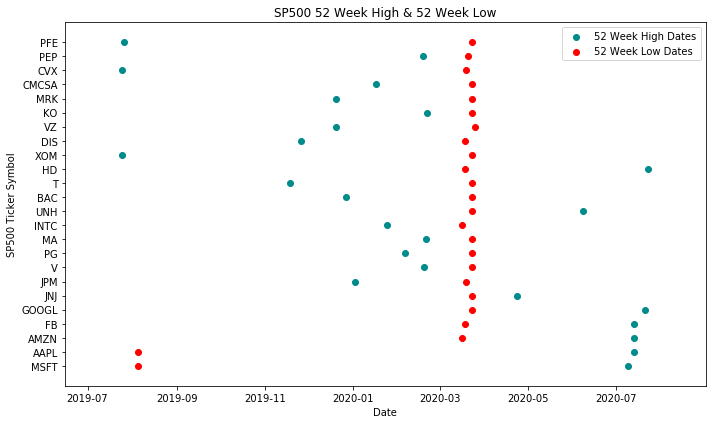

In [57]:
plt.figure(figsize=(10,6))

x_values = sp500_high_df['SP500 52 Week High Date']
x_values1 = sp500_high_df['SP500 52 Week Low Date']
y_values = sp500_high_df['SP500 Ticker Symbol']

plt.scatter(x_values,y_values, label = '52 Week High Dates', color = "darkcyan")
plt.scatter(x_values1,y_values, label = '52 Week Low Dates', color = "red")

plt.title("SP500 52 Week High & 52 Week Low")
plt.xlabel('Date')
plt.ylabel('SP500 Ticker Symbol')

plt.legend(loc="best")
plt.tight_layout()
plt.savefig("Figures/SP500 52 Week High & 52 Week Low.jpg")
plt.show()

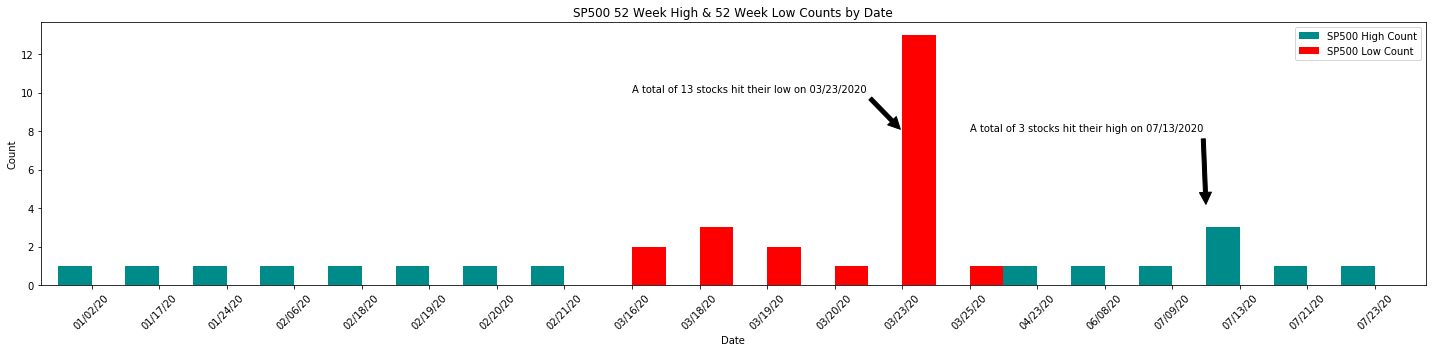

In [58]:
sp500_yr_2020 = sp500_high_low_df[(sp500_high_low_df.index >='2020-01-01')]

multi_plot = sp500_yr_2020[['SP500 High Count', 'SP500 Low Count']].plot(kind = 'bar' , width = 1, figsize = (20,5), color = ['darkcyan', 'r'])
multi_plot.set_xticklabels(sp500_yr_2020.index.strftime("%x"), rotation = 45)

plt.title("SP500 52 Week High & 52 Week Low Counts by Date")
plt.xlabel('Date')
plt.ylabel('Count')

multi_plot.annotate('A total of 13 stocks hit their low on 03/23/2020', xy=(12, 8), xytext=(8, 10),
            arrowprops=dict(facecolor='black', shrink=0.05))

multi_plot.annotate('A total of 3 stocks hit their high on 07/13/2020', xy=(16.5, 4), xytext=(13, 8),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.savefig("Figures/SP500 52 Week High & 52 Week Low Counts by Date.jpg")
plt.show()

In [28]:
nasdaq = ['MSFT','AAPL','AMZN','GOOGL','FB','INTC','CSCO','CMCSA','PEP','ADBE','NVDA','NFLX',
         'PYPL','COST','AMGN','AVGO','TXN','CHTR','SBUX','QCOM','GILD','MDLZ','FISV','BKNG','INTU',
         'ADP','CME','TMUS','ISRG','MU']
         

# nasdaq = ['MSFT','AAPL','AMZN','GOOGL',**'GOOG'**, 'FB','INTC','CSCO','CMCSA','PEP','ADBE','NVDA','NFLX',
#          'PYPL','COST','AMGN','AVGO','TXN','CHTR','SBUX','QCOM','GILD','MDLZ','FISV','BKNG','INTU',
#          'ADP','CME','TMUS','ISRG','MU']

In [29]:
nasdaq_high = []
nasdaq_high_date = []
nasdaq_low = []
nasdaq_low_date = []

for stock in nasdaq:
    query_url = f'{base_url}/stock/metric?symbol={stock}&metric=all&token={Api_key}'
    response = requests.get(query_url).json()
    
    nasdaq_high.append(response['metric']['52WeekHigh'])
    nasdaq_high_date.append(response['metric']['52WeekHighDate'])
    nasdaq_low.append(response['metric']['52WeekLow'])
    nasdaq_low_date.append(response['metric']['52WeekLowDate'])

In [30]:
nasdaq_dict = {
    "Nasdaq Ticker Symbol" : nasdaq,
    "Nasdaq 52 Week High" : nasdaq_high,
    "Nasdaq 52 Week High Date" : nasdaq_high_date,
    "Nasdaq 52 Week Low" : nasdaq_low,
    "Nasdaq 52 Week Low Date" : nasdaq_low_date
}    
    
nasdaq_high_df = pd.DataFrame(nasdaq_dict)

nasdaq_high_df['Nasdaq 52 Week High Date'] = pd.to_datetime(nasdaq_high_df['Nasdaq 52 Week High Date'])
nasdaq_high_df['Nasdaq 52 Week Low Date'] = pd.to_datetime(nasdaq_high_df['Nasdaq 52 Week Low Date'])

nasdaq_high_df

,Nasdaq Ticker Symbol,Nasdaq 52 Week High,Nasdaq 52 Week High Date,Nasdaq 52 Week Low,Nasdaq 52 Week Low Date
0,MSFT,216.3800,2020-07-09,130.7800,2019-08-05
1,AAPL,399.8200,2020-07-13,192.5800,2019-08-05
2,AMZN,3344.2900,2020-07-13,1626.0318,2020-03-16
3,GOOGL,1587.0500,2020-07-21,1008.8700,2020-03-23
4,FB,250.1500,2020-07-13,137.1006,2020-03-18
5,INTC,69.2900,2020-01-24,43.6300,2020-03-16
6,CSCO,57.6800,2019-07-24,32.4001,2020-03-16
7,CMCSA,47.7400,2020-01-17,31.7050,2020-03-23
8,PEP,147.2000,2020-02-18,101.4200,2020-03-20
9,ADBE,470.6100,2020-07-13,255.1314,2020-03-18


In [31]:
nasdaq_low_group = nasdaq_high_df.groupby('Nasdaq 52 Week Low Date').agg({'Nasdaq Ticker Symbol': ["count","- ".join],"Nasdaq 52 Week Low":["mean", "max", "min"]})
nasdaq_ticker_low = nasdaq_low_group['Nasdaq Ticker Symbol']
nasdaq_ticker_low = nasdaq_ticker_low.rename(columns = {"count" :"Nasdaq Low Count", "join" : "Nasdaq Low Ticker Symbols"})
nasdaq_ticker_low

,Nasdaq Low Count,Nasdaq Low Ticker Symbols
Nasdaq 52 Week Low Date,,
2019-07-26,1,AMGN
2019-08-05,3,MSFT- AAPL- COST
2019-08-15,1,NVDA
2019-09-24,1,NFLX
2019-10-03,1,GILD
2020-03-16,4,AMZN- INTC- CSCO- TXN
2020-03-18,9,FB- ADBE- AVGO- CHTR- SBUX- QCOM- ADP- TMUS- MU
2020-03-19,2,FISV- CME
2020-03-20,1,PEP


In [32]:
nasdaq_high_group = nasdaq_high_df.groupby('Nasdaq 52 Week High Date').agg({'Nasdaq Ticker Symbol': ["count", "- ".join],"Nasdaq 52 Week High":["mean", "max", "min"]})
nasdaq_ticker_high = nasdaq_high_group['Nasdaq Ticker Symbol']
nasdaq_ticker_high = nasdaq_ticker_high.rename(columns = {"count" :"Nasdaq High Count", "join" : "Nasdaq High Ticker Symbols"})
nasdaq_ticker_high

,Nasdaq High Count,Nasdaq High Ticker Symbols
Nasdaq 52 Week High Date,,
2019-07-24,1,CSCO
2019-07-26,1,SBUX
2020-01-10,1,BKNG
2020-01-17,2,CMCSA- QCOM
2020-01-24,2,INTC- AVGO
2020-02-04,1,FISV
2020-02-12,1,MU
2020-02-18,2,PEP- ADP
2020-02-19,1,MDLZ


In [33]:
nasdaq_high_low_df = pd.concat([nasdaq_ticker_high, nasdaq_ticker_low]).sort_index()
nasdaq_high_low_df

,Nasdaq High Count,Nasdaq High Ticker Symbols,Nasdaq Low Count,Nasdaq Low Ticker Symbols
2019-07-24,1.0,CSCO,NaN,NaN
2019-07-26,NaN,NaN,1.0,AMGN
2019-07-26,1.0,SBUX,NaN,NaN
2019-08-05,NaN,NaN,3.0,MSFT- AAPL- COST
2019-08-15,NaN,NaN,1.0,NVDA
2019-09-24,NaN,NaN,1.0,NFLX
2019-10-03,NaN,NaN,1.0,GILD
2020-01-10,1.0,BKNG,NaN,NaN
2020-01-17,2.0,CMCSA- QCOM,NaN,NaN
2020-01-24,2.0,INTC- AVGO,NaN,NaN


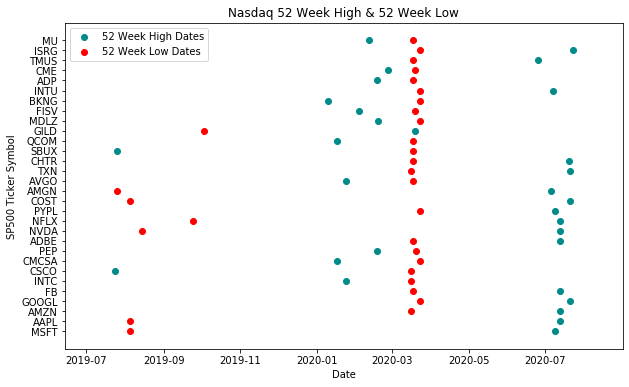

In [54]:
plt.figure(figsize=(10,6))

x_values = nasdaq_high_df['Nasdaq 52 Week High Date']
x_values1 = nasdaq_high_df['Nasdaq 52 Week Low Date']
y_values = nasdaq_high_df['Nasdaq Ticker Symbol']

plt.scatter(x_values,y_values, label = '52 Week High Dates', color = "darkcyan")
plt.scatter(x_values1,y_values, label = '52 Week Low Dates', color = "red")

plt.title("Nasdaq 52 Week High & 52 Week Low")
plt.xlabel('Date')
plt.ylabel('SP500 Ticker Symbol')

plt.legend(loc="best")

plt.savefig("Figures/Nasdaq 52 Week High & 52 Week Low.jpg")
plt.show()

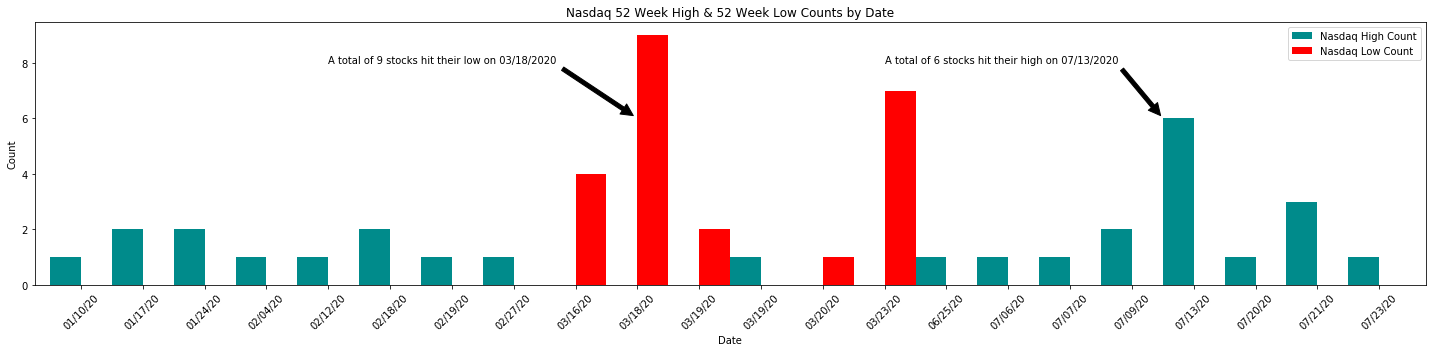

In [53]:
nasdaq_yr_2020 = nasdaq_high_low_df[(nasdaq_high_low_df.index >='2020-01-01')]

multi_plot = nasdaq_yr_2020[['Nasdaq High Count', 'Nasdaq Low Count']].plot(kind = 'bar' , width = 1, figsize = (20,5), color = ['darkcyan', 'r'])
multi_plot.set_xticklabels(nasdaq_yr_2020.index.strftime("%x"), rotation = 45)

plt.title("Nasdaq 52 Week High & 52 Week Low Counts by Date")
plt.xlabel('Date')
plt.ylabel('Count')

multi_plot.annotate('A total of 9 stocks hit their low on 03/18/2020', xy=(9, 6), xytext=(4, 8),
            arrowprops=dict(facecolor='black', shrink=0.05))

multi_plot.annotate('A total of 6 stocks hit their high on 07/13/2020', xy=(17.5, 6), xytext=(13, 8),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.savefig("Figures/Nasdaq 52 Week High & 52 Week Low Counts by Date.jpg")
plt.show()